In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
housing = pd.read_csv('Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

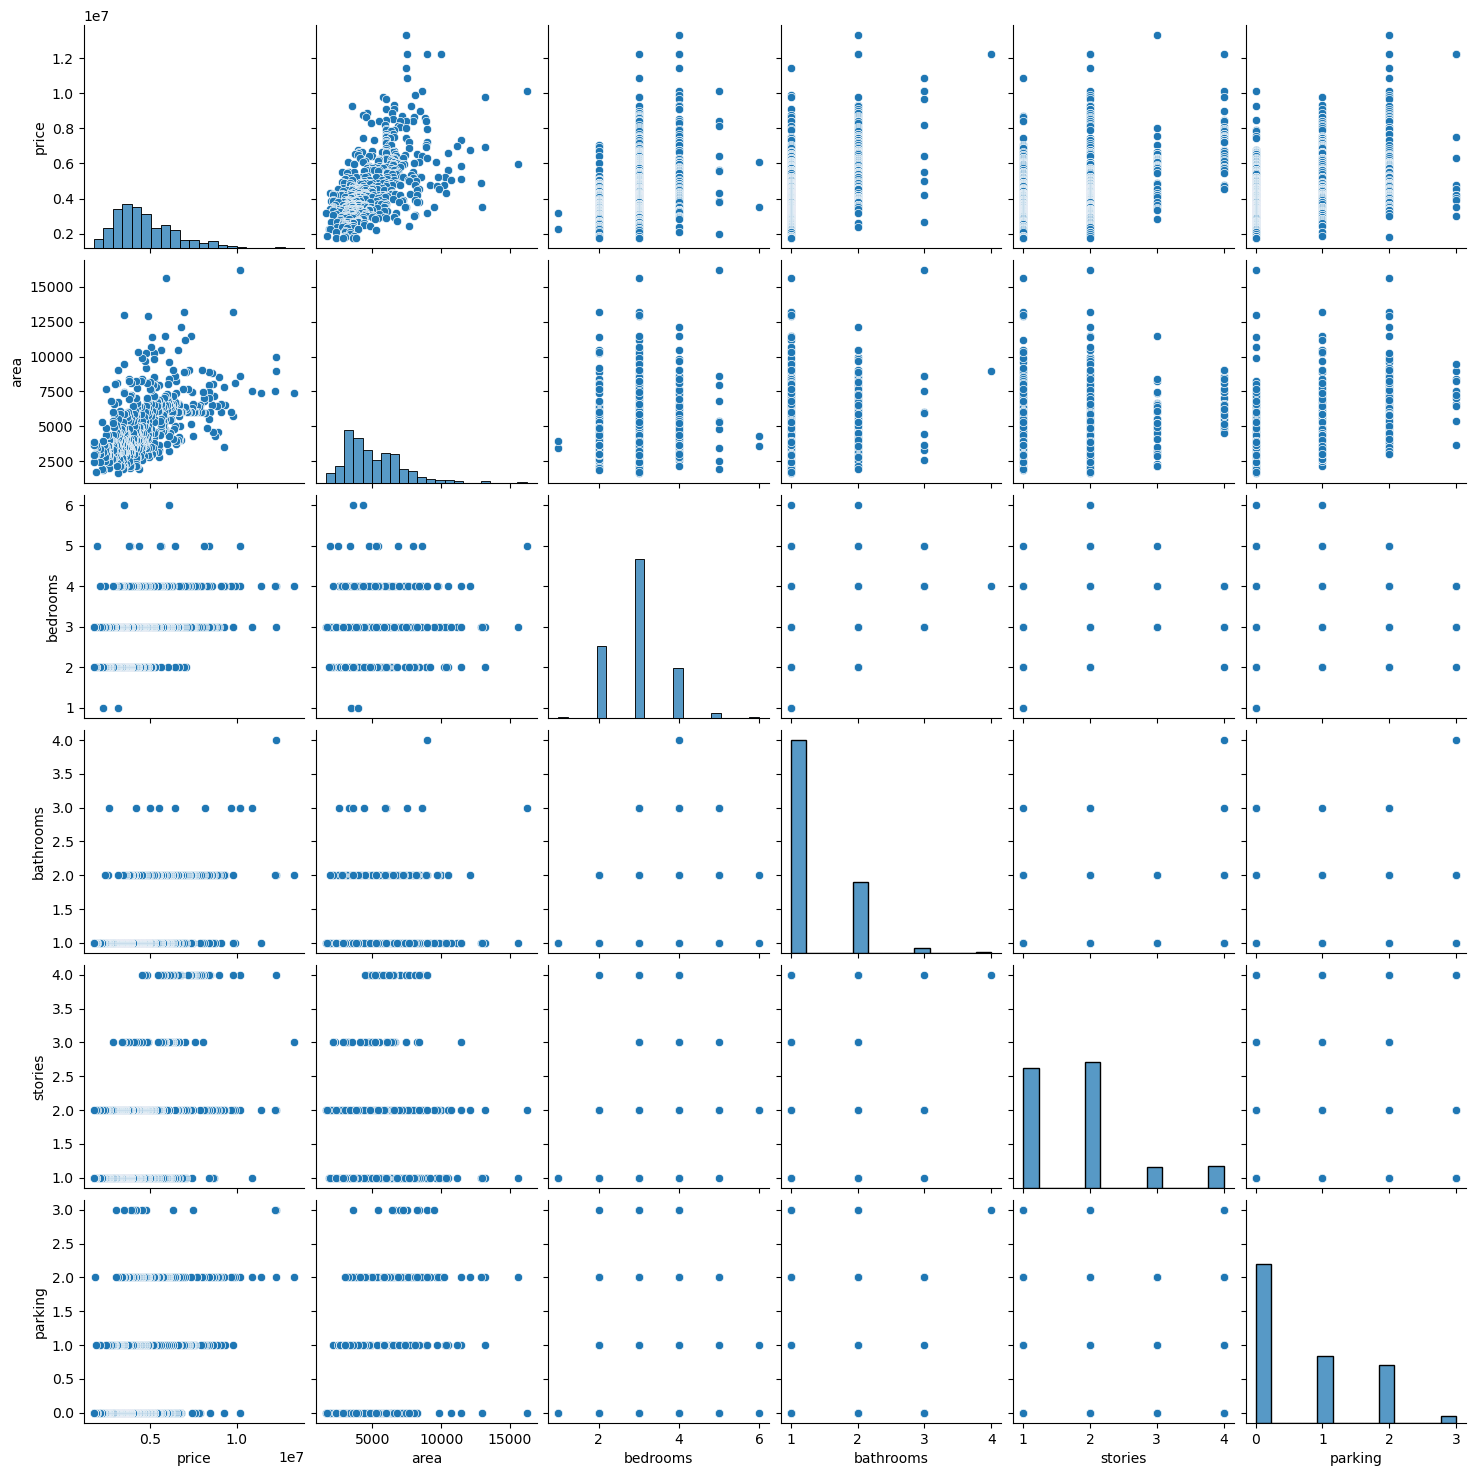

In [8]:
sns.pairplot(housing)

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

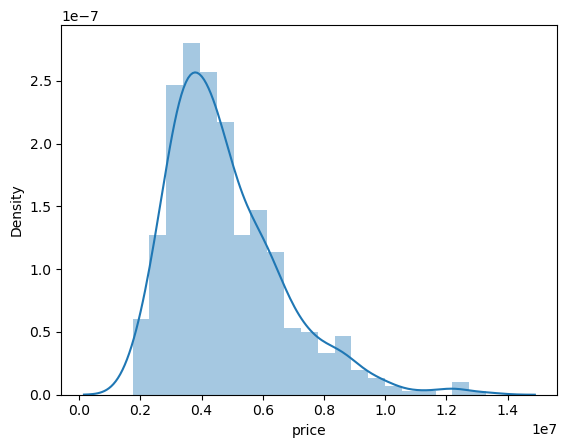

In [9]:
sns.distplot(housing['price'])

In [11]:
housing.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


<AxesSubplot:>

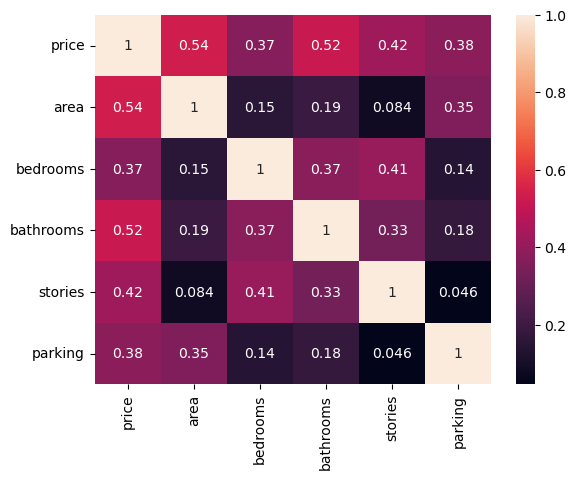

In [12]:
sns.heatmap(housing.corr(),annot=True)

In [13]:
X = housing[['area', 'bedrooms', 'bathrooms', 'stories','parking']]
y = housing['price']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train,y_train)

LinearRegression()

In [20]:
print(lm.intercept_)

-249782.6169222137


In [21]:
lm.coef_

array([3.38566876e+02, 1.83745190e+05, 1.11961854e+06, 5.29559510e+05,
       4.13670967e+05])

In [23]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['coeff'])

In [24]:
cdf

,coeff
area,3.385669e+02
bedrooms,1.837452e+05
bathrooms,1.119619e+06
stories,5.295595e+05
parking,4.136710e+05


In [25]:
## Predictions

In [26]:
predictions = lm.predict(X_test)

In [27]:
predictions


array([5188269.39416599, 5984558.61540079, 5469317.58599748,
       5571149.66321526, 3868015.00498591, 3612075.28711484,
       7287745.48444339, 3950190.13224572, 3169471.75655356,
       5841045.21928749, 4186567.5675926 , 6233669.33145656,
       4002346.27154702, 4845735.15626982, 5304790.92465007,
       5176719.25265942, 6354634.32980491, 6690329.32778027,
       2999269.24153022, 3668560.24729179, 4896482.50293166,
       3916633.14379826, 5367747.5231934 , 4124230.34691191,
       3142386.40647248, 4559610.5090702 , 3669196.46554964,
       3479978.49735222, 3556833.17820731, 4925262.73516488,
       7281747.90428664, 3679636.33058874, 5849431.56414925,
       3038825.8579065 , 5075007.96574647, 3375078.47390532,
       3397085.3208462 , 7292788.35061546, 3508079.54806135,
       2985726.56648968, 4193958.28297551, 6003443.85576731,
       4233047.85321796, 5570887.64880156, 3358769.50796728,
       3254113.47555696, 4513903.98080836, 4536530.20561188,
       6363909.94380898,

In [28]:
y_test

225    4753000
18     8890000
48     7455000
355    3773000
350    3780000
        ...   
74     6650000
361    3710000
51     7420000
132    5810000
44     7560000
Name: price, Length: 180, dtype: int64

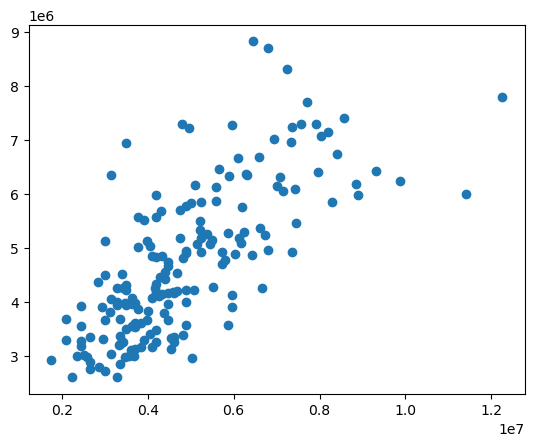

In [29]:
plt.scatter(y_test,predictions)

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

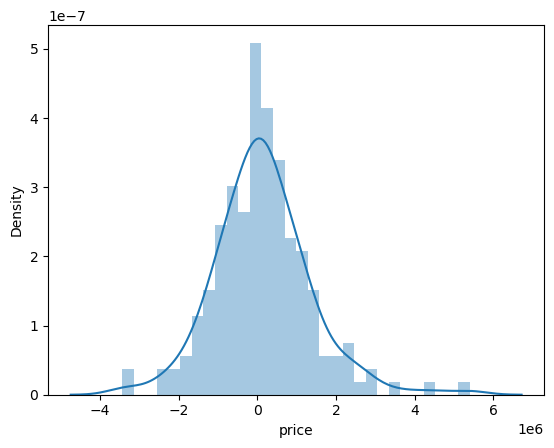

In [31]:
# Residuals

sns.distplot(y_test-predictions,bins=30)